In [177]:
# import the libraries we gonna use for this analysis
import numpy as np
import pandas as pd

# Visualisazation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# sklearn libraries that i will use for this task
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans


# Eploration Data Analysis

First I did data explaration, the data set contain none null values. It consist of five columns and 50 rows, with object, interger and flaot as data point. I plotted a corralation heatmap which shows which instances of the data set are highly corrolated. Murder has a high colaration with assault, as well as rape and asualt, their corrolations is  0.8 and 0.67 respectively. these is to be expected due to nature of these crimes. while urbanpop has the loswest corrolation with the other instances.

In [178]:
# load the data set and read the first five rows
df = pd.read_csv('usArrests.csv') 
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [179]:
df.shape # print out the shape of the data set

(50, 5)

In [180]:
# get information about the data set
# look for missing values and what kind of data we are dealing with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [181]:
df.describe() # gett the statistics of the data set.

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


<AxesSubplot:>

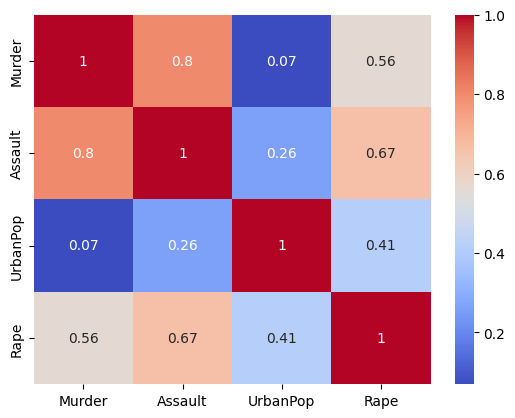

In [182]:
corr_df = df.corr() # assign the corroation relationships of the dataset to the variable corr_df
sns.heatmap(corr_df, cmap ='coolwarm',annot=True ) # use seaborn to plot a heat map of the corrolations

Here, i create a subset of the original data set and exclude the city column aas it is a object data type.I do this because I want to use the numerical values to calculate the value of K, using the elbow method. the reason I do this is to get an idea how many cluster are likely to form and also it makes it easy when i fit the data to the models to know the value of k. The value of K turns out to be, this is to be expected as the we have four different crimes recorded in the data set. the elbow method showed that the value of k is occure between k = 2 to k = 5. using the dendogram, with the complete linkage, metric used the eucllidean, showed the are four clusters that are formed. 

In [183]:
# create a subdataframe of the original without the city column
df_2 = df.drop(['City'], axis = 1)

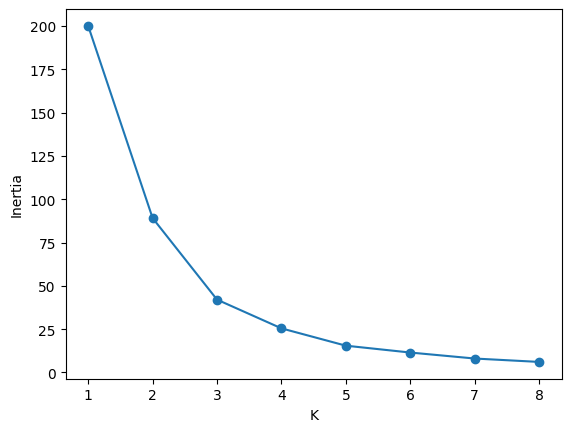

In [184]:
X = pca_df.values.reshape(-1,1) 
# create a function obtaine the elbow plot of the data set
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r)
    kmeans.fit(x)    
    return kmeans.inertia_

def elbow_Kmeans(x, max_k = 8, r=123):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1,max_k+1)]
    plt.plot(range(1,9), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

elbow_Kmeans(X)

In [185]:
# select and standardize features
np.set_printoptions(precision=2)
X = StandardScaler().fit_transform(df_2.values.squeeze())

pca = PCA(n_components = 4)

# obtain components
principal_components = pca.fit_transform(X)

# transform the components into a pandas data frame
pca_df = pd.DataFrame(principal_components)

# This is to include the country code  as the rownames in the PC's
pca_df.head()

,0,1,2,3
0,0.985566,1.133392,-0.444269,0.156267
1,1.950138,1.073213,2.040003,-0.438583
2,1.763164,-0.745957,0.054781,-0.834653
3,-0.141420,1.119797,0.114574,-0.182811
4,2.523980,-1.542934,0.598557,-0.341996


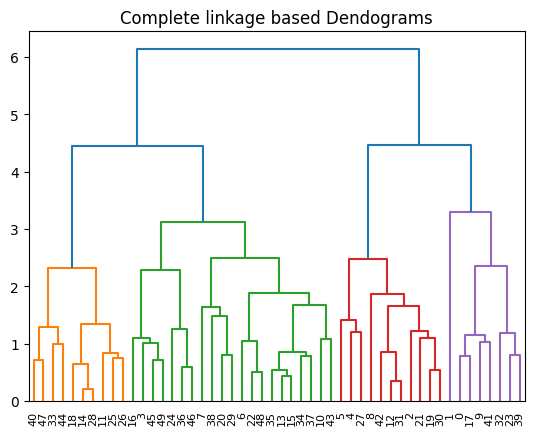

In [186]:
# visualising th dendogram base on the avarage linkage with the euclidean metric
plt.title("Complete linkage based Dendograms")  
dend = dendrogram(linkage(X, method='complete', metric = 'euclidean'))

I fitted the data into the kmeans and clustering method, Evaluated both the method using the silihoutte metrix as well as the confusion matrix and the classification report. I also encoder the city column chose numbers to represent the city, with 0 representing Alabama, 1 representing Alaska ect... I did this so that i can work with numerical values. The evaluation methods show a low score for both models. The silhoute for the clustering model is 0.33 while that of the kmeans model is 0.34. these score are low as they closer to to zero that they are to 1. which means this models are not best suited for this data set.

In [187]:
# cleating the cluster instance and fit the data
cluster = AgglomerativeClustering(n_clusters= 4, affinity='euclidean') 
cluster.fit_predict(X)

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 0, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [188]:
# evaluating the cluster instance using the silhoutte method
score = silhouette_score(X, cluster.labels_,  metric='euclidean')
print(f'The Silhoutte score is: {score}')

The Silhoutte score is: 0.3370187183556962


In [189]:
# Creatiing the kmeans instance 
kmeans = KMeans(n_clusters = 4) # enco

In [190]:
# encoding the values of the city columns to numbers.
df['City'].replace({'Alabama':0,'Alaska':1,'Arizona':2,'Arkansas':3,'California':4,'Colorado':5,'Connecticut':6, 
                    'Delaware':7, 'Florida':8,'Georgia':9,'Hawaii':10,'Idaho':11, 'Illinois':12,'Indiana':13,
                    'Iowa':14, 'Kansas':15, 'Kentucky':16, 'Louisiana':17,'Maine':18, 'Maryland':19,
                    'Massachusetts':20,'Michigan':21,'Minnesota':22, 'Mississippi':23,'Missouri':24,'Montana':25,
                    'Nebraska':26, 'New Hampshire':27, 'Nevada':28, 'New Jersey':29,'New Mexico':30,'New York':31,
                    'North Carolina':32,'North Dakota':33,'Ohio':34,'Oklahoma':35,'Oregon':36,'Pennsylvania':37,
                    'Rhode Island':38,'South Carolina':39,'South Dakota':40,'Tennessee':41,'Texas':42,'Utah':43,
                    'Vermont':44,'Virginia':45,'Washington':46,'West Virginia':47,'Wisconsin':48,'Wyoming':49},
                  inplace = True)

In [197]:
df.tail() # check on how the data set look like after the changes, by pprint the last five rows

,City,Murder,Assault,UrbanPop,Rape
45,45,8.5,156,63,20.7
46,46,4.0,145,73,26.2
47,47,5.7,81,39,9.3
48,48,2.6,53,66,10.8
49,49,6.8,161,60,15.6


In [192]:
# fitting the data n the KMeans
kmeans.fit(df.drop('Murder', axis = 1))

KMeans(n_clusters=4)

In [193]:
# importing the classification report and confusion matrix
# I will use this libraries to evaluate the performans of the kmeans model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

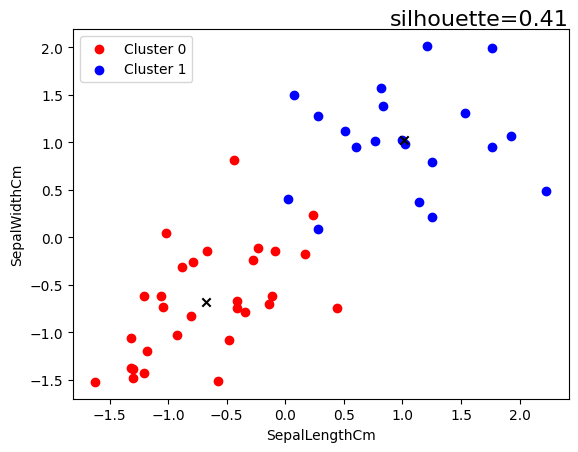

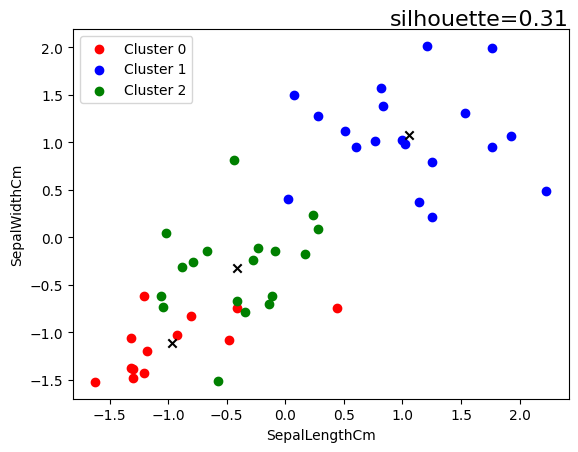

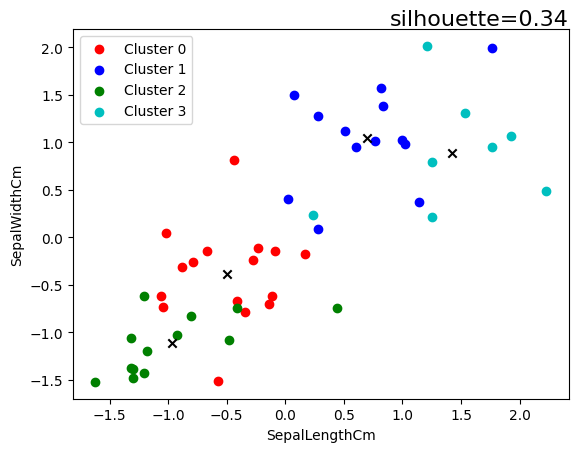

In [194]:
# plot the scatter plots of the Kmeans clusters
# which show that the optimum clusters occure at the silhoutte value 0.34
def scatter_Kmeans(x, k, r=123):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    
    score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'),2)
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel('SepalLengthCm')
    plt.ylabel('SepalWidthCm')
    plt.legend()
    plt.show()

for k in range(2,5):
  scatter_Kmeans(X, k, r=0)

In [195]:
# printing the confusion matrix fo the kmeans model
print(confusion_matrix(df['City'],kmeans.labels_)) #

[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [196]:
# classification report for the kmeans model
# which shows an accuracy of 0.02
print(classification_report(df['City'],kmeans.labels_))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.06      1.00      0.12         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00    

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

# Conclusion

The evaluation methods especially the silhoutte value of clustering = 0.33 and kmeans = 0.34 suggest that the performance both models is similar. However these results show that the models are not a god fitt for this dataset.  one of the reasons this data is not best suited, may due to that it contains continuous data points. This suggest that a multiple linear regression model may yield better results than the clustering model. 

# Reference

https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
https://www.kaggle.com/code/kerneler/starter-usarrets-73d905cc-b